In [ ]:
import numpy as np,pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy import optimize

In [ ]:
 from sklearn.datasets import fetch_openml
df = fetch_openml('mnist_784', cache=False)

In [ ]:
X = df.data.astype('float32')
Y = df.target.astype('int64')

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

Example data class:  2


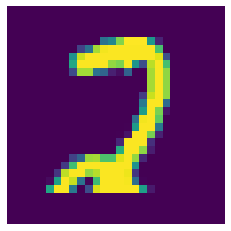

In [ ]:
 
#Lets see an example of the data
plt.imshow(X_train[0].reshape(28,28))
plt.axis('off')
print('Example data class: ',Y_train[0])

In [ ]:
input_layer_size  = 784
hidden_layer_size = 56
num_labels = 10
 
 
def nnrandomlyInitializeWeights( L_in, L_out, epsilon_init=0.12): 
  W = np.random.rand(L_out, 1 + L_in) * 2 * epsilon_init - epsilon_init
  return W
 
def nnInitialize( ):
  print('Initializing Neural Network Parameters ...')
  initial_Theta1 =  nnrandomlyInitializeWeights( input_layer_size,  hidden_layer_size) 
  initial_Theta2 =  nnrandomlyInitializeWeights( hidden_layer_size,  num_labels)
  initial_nn_params = np.concatenate([initial_Theta1.ravel(), initial_Theta2.ravel()], axis=0)
  print('Setting nnparams.....')
  return initial_nn_params
 
nn_params = nnInitialize( )    
 
def sigmoid( z):
  return 1/(1+np.exp(-z))
  
def sigmoidGradient( z2):
  g =  sigmoid(z2)
  g = g*(1-g)
  return g
 
def nnfeed_forward(Theta1, Theta2,X ):
  A2 =  sigmoid( X.dot( Theta1.T))
  A2 = np.concatenate([np.ones((A2.shape[0], 1)), A2], axis=1)
  return  A2.dot( Theta2.T)
 
def predict(Theta1, Theta2, X):
  m = X.shape[0]
  num_labels = Theta2.shape[0]
  p = np.zeros(m)
  h1 = sigmoid(np.dot(np.concatenate([np.ones((m, 1)), X], axis=1), Theta1.T))
  h2 = sigmoid(np.dot(np.concatenate([np.ones((m, 1)), h1], axis=1), Theta2.T))
  p = np.argmax(h2, axis=1)
  return p
 
 
def nncost(X,y,nn_params,input_layer_size,hidden_layer_size,num_labels,lambda_=0):
  Theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size + 1)],                    (hidden_layer_size, (input_layer_size + 1)))
 
  Theta2 = np.reshape(nn_params[(hidden_layer_size * (input_layer_size + 1)):],
                    (num_labels, (hidden_layer_size + 1)))
  X = np.array(X)
  Y = y.reshape(-1)
  Y = np.eye(num_labels)[Y]
  # Setup some useful variables
  m = y.size
  # map classes as vectors
  Y = y.reshape(-1)
  Y = np.eye(num_labels)[Y]
  #print(y[2420 ,:])
  X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
  A2 = X.dot(Theta1.T) #5000 x 401 25x401 > 5000,25
  A2 = sigmoid(A2) #5000,25
  A2 = np.concatenate([np.ones((A2.shape[0], 1)), A2], axis=1) #5000,26
  #print('X incl bias: ',Theta1.shape) 
  #print('Theta1: ',Theta1.shape) 
  #print('A2 incl bias: ',A2.shape) 
  #print('Theta2: ',Theta2.shape) 
  y_pred = A2.dot(Theta2.T)  #5000,26 26,10 
  y_pred = sigmoid(y_pred)  #5000, 10
  grad =0    
  #print(y_pred.shape)
  J = (((-Y*np.log(y_pred)) - ((1-Y)*np.log(1-y_pred))).sum(axis=1)).sum(axis=0) / m  +  ( (lambda_ /(2*m) ) * ((np.square(Theta1[:,1:]).sum(axis=0)).sum() + (np.square(Theta2[:,1:]).sum(axis=0)).sum()))
  d3 =  y_pred - Y  #5000, 10
  z2 = X.dot(Theta1.T)
  #print('z2',z2.shape)
  d2 = d3.dot(Theta2[:,1:]) * sigmoidGradient(z2) #5000, 10 10,25  --> 5000,25 5000,25----> 5000,25
  #print('d2: ',d2.shape) 
  Delta1 = d2.T.dot(X)
  #print('Delta1: ',Delta1.shape)
  Delta2 = d3.T.dot(A2)
  #print('Delta2: ',Delta2.shape)
  Theta1_grad = (1 / m) * Delta1
  Theta1_grad[:, 1:] = Theta1_grad[:, 1:] + (lambda_ / m) * Theta1[:, 1:]
  #print('Theta1_grad: ',Theta1_grad.shape)
  Theta2_grad = (1 / m) * Delta2
  Theta2_grad[:, 1:] = Theta2_grad[:, 1:] + (lambda_ / m) * Theta2[:, 1:]
  #print('Theta2_grad: ',Theta2_grad.shape)
  grad = np.concatenate([Theta1_grad.ravel(), Theta2_grad.ravel()])
  print('cost: ',J)
  return J, grad
 
 
options= {'maxiter': 300}
lambda_ = 0.4
initial_nn_params = nnInitialize( )
# Create "short hand" for the cost function to be minimized
costFunction = lambda p: nncost(X_train, Y_train,p, input_layer_size,
                                        hidden_layer_size,
                                        num_labels,  lambda_)
 
# Now, costFunction is a function that takes in only one argument
# (the neural network parameters)
res = optimize.minimize(costFunction,
                        initial_nn_params,
                        jac=True,
                        method='TNC',
                        options=options)
 
# get the solution of the optimization
nn_params = res.x
        
# Obtain Theta1 and Theta2 back from nn_params
Theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size + 1)],
                    (hidden_layer_size, (input_layer_size + 1)))
 
Theta2 = np.reshape(nn_params[(hidden_layer_size * (input_layer_size + 1)):],
                    (num_labels, (hidden_layer_size + 1)))

Initializing Neural Network Parameters ...
Setting nnparams.....
Initializing Neural Network Parameters ...
Setting nnparams.....


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in exp


cost:  7.083122011641458
cost:  7.083121517463519
cost:  7.083115161623828
cost:  3.27433710783474
cost:  3.2743370749878236
cost:  3.274336993211863
cost:  3.1637627400327735
cost:  3.3797765498039447
cost:  3.1682742347813866
cost:  3.128545516648374
cost:  3.1285455041763575
cost:  3.12853428733237
cost:  2.8046422420547463
cost:  2.8046421583100094
cost:  2.8046400314080078
cost:  2.450005583440999
cost:  2.450005534080949
cost:  2.4500048105759107
cost:  2.283543798144759
cost:  2.163971131557702
cost:  2.1639710064482856
cost:  2.1639467906065213
cost:  1.8993044949793443
cost:  1.8384953060011358
cost:  1.8384952396347085
cost:  1.8384924330530923
cost:  1.7234694575096885
cost:  1.8071104399052165
cost:  1.6947081821993173
cost:  1.6947080978557627
cost:  1.6946967016722427
cost:  1.5131635770644942
cost:  2.3606726337905095
cost:  1.692762245984045
cost:  1.5183424721754897
cost:  1.4895126790598778
cost:  1.4895126376487164
cost:  1.4895110048208609
cost:  1.427867943036784
c

In [ ]:
#Save learnt parameters to file
np.save('./weights', nn_params)

In [ ]:
 
#Run this cell to load weights amd then run predict
nn_params = np.load('./weights.npy')
#reconstruct thetas
Theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size + 1)],                    (hidden_layer_size, (input_layer_size + 1)))
 
Theta2 = np.reshape(nn_params[(hidden_layer_size * (input_layer_size + 1)):],
                    (num_labels, (hidden_layer_size + 1)))

In [ ]:
pred = predict(Theta1, Theta2, X_train)
print('Training Set Accuracy: {:.2F}%'.format((np.mean(pred == Y_train) * 100)))

Training Set Accuracy: 92.50%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in exp


In [ ]:
pred = predict(Theta1, Theta2, X_test)
print('Test Set Accuracy: {:.2F}%'.format((np.mean(pred == Y_test) * 100)))

Test Set Accuracy: 92.17%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in exp


 Let's see some examples from the test set

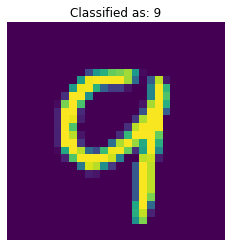

In [ ]:
i = 0
s = 'Classified as: '+ str(pred[i])
plt.title(s)
plt.axis('off')
plt.imshow(X_test[i].reshape(28,28))
plt.show()

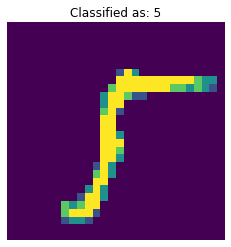

In [ ]:
 i = 1
s = 'Classified as: '+ str(pred[i])
plt.title(s)
plt.axis('off')
plt.imshow(X_test[i].reshape(28,28))
plt.show()

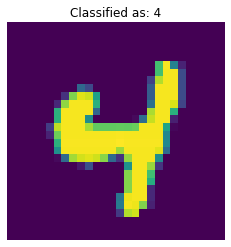

In [ ]:
 i = 2
s = 'Classified as: '+ str(pred[i])
plt.title(s)
plt.axis('off')
plt.imshow(X_test[i].reshape(28,28))
plt.show()

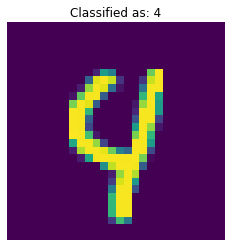

In [ ]:
 i = 3
s = 'Classified as: '+ str(pred[i])
plt.title(s)
plt.axis('off')
plt.imshow(X_test[i].reshape(28,28))
plt.show()

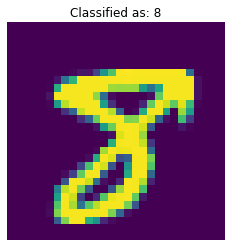

In [ ]:
 i = 4
s = 'Classified as: '+ str(pred[i])
plt.title(s)
plt.axis('off')
plt.imshow(X_test[i].reshape(28,28))
plt.show()

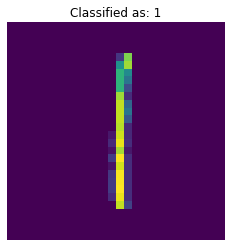

In [ ]:
 i = 5
s = 'Classified as: '+ str(pred[i])
plt.title(s)
plt.axis('off')
plt.imshow(X_test[i].reshape(28,28))
plt.show()

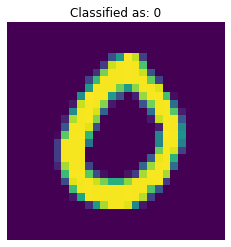

In [ ]:
 i = 6
s = 'Classified as: '+ str(pred[i])
plt.title(s)
plt.axis('off')
plt.imshow(X_test[i].reshape(28,28))
plt.show()

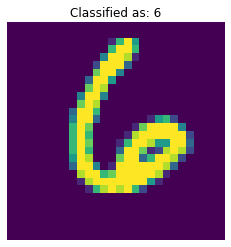

In [ ]:
 i = 8
s = 'Classified as: '+ str(pred[i])
plt.title(s)
plt.axis('off')
plt.imshow(X_test[i].reshape(28,28))
plt.show()